#Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

**Dataset Description:**
The dataset consists of the following variables:
- **Age:** Age in years
- **KM:** Accumulated Kilometers on odometer
- **FuelType:** Fuel Type (Petrol, Diesel, CNG)
- **HP:** Horse Power
- **Automatic:** Automatic ( (Yes=1, No=0)
- **CC:** Cylinder Volume in cubic centimeters
- **Doors:** Number of doors
- **Weight:** Weight in Kilograms
- **Quarterly_Tax:**
- **Price:** Offer Price in EUROs


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#load dataset ToyotaCorolla
dataset_Toyata = pd.read_csv(r'/content/drive/MyDrive/ToyotaCorolla - MLR.csv')
dataset_Toyata

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

###Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.


###EDA

In [ ]:
#first 5 rows
dataset_Toyata.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [ ]:
#last 5 rows
dataset_Toyata.tail()

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114

In [ ]:
dataset_Toyata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
#Summary Stastics
dataset_Toyata.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

 **Price:**
- The average price of the cars is approximately 10730.
- The prices range from 4350 to 32500.
- The standard deviation is high, indicating significant variation in prices.

**Age_08_04:**
- The average age of the cars is about 56 months.
- The ages range from 1 month to 80 months.
- The standard deviation is around 19 months, showing moderate variability in car ages.

**KM (Kilometers driven):**
- The average kilometers driven is about 68533 km.
- The range is from 1 km to 243000 km, indicating a wide range of usage.
- The standard deviation is quite high, reflecting substantial variation in usage.

**HP (Horsepower):**
- The average horsepower is approximately 101.
- The range of horsepower is from 69 to 192.
- The standard deviation is about 15, indicating moderate variability in horsepower.

**Automatic:**
- Only about 5.57% of the cars have automatic transmission (mean is approximately 0.055710).
- The values range from 0 to 1, indicating binary data (0 for manual, 1 for automatic).

**cc (Engine displacement):**
- The average engine displacement is about 1577 cc.
- The values range widely from 1300 cc to 16000 cc, with a high standard deviation, indicating diverse engine sizes.

**Doors:**
- The average number of doors is approximately 4.
- The number of doors ranges from 2 to 5, with most cars having 4 or 5 doors.

**Cylinders:**
- All cars have 4 cylinders (mean and min-max values are 4).

**Gears:**
- The average number of gears is about 5.
- The number of gears ranges from 3 to 6, with most cars having 5 gears.

**Weight:**
- The average weight of the cars is about 1072 kg.
- The weights range from 1000 kg to 1615 kg.
- The standard deviation is relatively low, indicating less variability in car weights.

In [ ]:
#missing values
dataset_Toyata.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

**No missing values**

In [ ]:
#Datatypes
dataset_Toyata.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [ ]:
dataset_Toyata.shape

(1436, 11)

In [ ]:
#To view columns
dataset_Toyata.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
#Typcasting datatypes
dataset_Toyata['Automatic'] = dataset_Toyata['Automatic'].astype('bool')
dataset_Toyata['Fuel_Type'] = dataset_Toyata['Fuel_Type'].astype('category')

In [ ]:
dataset_Toyata.dtypes

Price           int64
Age_08_04       int64
KM              int64
Fuel_Type    category
HP              int64
Automatic        bool
cc              int64
Doors           int64
Cylinders       int64
Gears           int64
Weight          int64
dtype: object

## Univariate analysis of a Categorical data


In [ ]:
dataset_Toyata['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

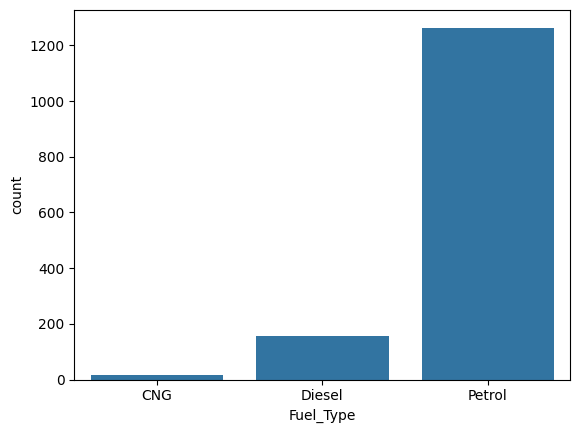

In [ ]:
sns.countplot(x='Fuel_Type',data=dataset_Toyata)

**Here petrol is the mostly used fuel, followed by diesel and lowest is CNG**

##Univariate Numerical variable analysis

In [ ]:
toyota_numerical_cls = dataset_Toyata.select_dtypes(include = ['int64'])
toyota_numerical_cls.dtypes

Price        int64
Age_08_04    int64
KM           int64
HP           int64
cc           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

In [ ]:
for col in toyota_numerical_cls.columns:
      print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",toyota_numerical_cls[col].min(), ", ",toyota_numerical_cls[col].max(),"]"))

range of Price: [4350, 32500]
range of Age_08_04: [1, 80]
range of KM: [1, 243000]
range of HP: [69, 192]
range of cc: [1300, 16000]
range of Doors: [2, 5]
range of Cylinders: [4, 4]
range of Gears: [3, 6]
range of Weight: [1000, 1615]


In [ ]:
for col in toyota_numerical_cls.columns:
      print("Standard deviation and varince of {}{}{}{}{}{}{}{}".format(col,":"," ","[",toyota_numerical_cls[col].std(), ", ",toyota_numerical_cls[col].var(),"]"))

Standard deviation and varince of Price: [3626.9645849102444, 13154872.100193143]
Standard deviation and varince of Age_08_04: [18.599988342806235, 345.9595663525279]
Standard deviation and varince of KM: [37506.44887218956, 1406733707.0021698]
Standard deviation and varince of HP: [14.9810796755677, 224.43274824570764]
Standard deviation and varince of cc: [424.38676985232337, 180104.13042568887]
Standard deviation and varince of Doors: [0.9526766046325882, 0.9075927130142767]
Standard deviation and varince of Cylinders: [0.0, 0.0]
Standard deviation and varince of Gears: [0.18851044383559656, 0.03553618743509361]
Standard deviation and varince of Weight: [52.64112048693106, 2771.087566119593]


**High variability (as seen in Price, KM, and cc) suggests a diverse range of values, while low variability (as seen in Cylinders and Gears) suggests uniformity.**

In [ ]:
for col in toyota_numerical_cls.columns:
      print("Kurtosis and Skewness of {}{}{}{}{}{}{}{}".format(col,":"," ","[",toyota_numerical_cls[col].kurt(), ", ",toyota_numerical_cls[col].skew(),"]"))

Kurtosis and Skewness of Price: [3.737781189982718, 1.7038849799952995]
Kurtosis and Skewness of Age_08_04: [-0.0766324777459908, -0.82670187309842]
Kurtosis and Skewness of KM: [1.6850567186709635, 1.0159121980877577]
Kurtosis and Skewness of HP: [8.836433875040042, 0.9558356472519488]
Kurtosis and Skewness of cc: [930.7112265066064, 27.431792795981686]
Kurtosis and Skewness of Doors: [-1.8747649199236034, -0.07639499290452467]
Kurtosis and Skewness of Cylinders: [0, 0]
Kurtosis and Skewness of Gears: [37.703476140899774, 2.283959738160194]
Kurtosis and Skewness of Weight: [19.362901418637517, 3.108639394626062]


- **Right-skewed distributions (Price, KM, HP, cc, Gears, Weight)** indicate the presence of a few high values pulling the mean to the right.
- **Left-skewed distribution (Age_08_04)** suggests there are a few lower values pulling the mean to the left.
- **High kurtosis in variables (Price, HP, cc, Gears, Weight)** indicates a distribution with heavy tails and a sharp peak, suggesting the presence of extreme outliers.
- **Low or negative kurtosis in variables (Age_08_04, Doors)** suggests a flatter distribution with fewer outliers.
- **Uniformity in variables (Cylinders)** confirms no variability, indicating all data points have the same value.

In [ ]:
#Outlier detection
for col in toyota_numerical_cls.columns:
    Q1 = np.quantile(toyota_numerical_cls[col],0.25)
    Q2 = np.quantile(toyota_numerical_cls[col],0.50)
    Q3 = np.quantile(toyota_numerical_cls[col],0.75)
    print(col, '----->', 'min:', toyota_numerical_cls[col].min(), ',Q1:', Q1, ',Q2:', Q2, ',Q3:', Q3, ',max:', toyota_numerical_cls[col].max(), '\n')

Price -----> min: 4350 ,Q1: 8450.0 ,Q2: 9900.0 ,Q3: 11950.0 ,max: 32500 

Age_08_04 -----> min: 1 ,Q1: 44.0 ,Q2: 61.0 ,Q3: 70.0 ,max: 80 

KM -----> min: 1 ,Q1: 43000.0 ,Q2: 63389.5 ,Q3: 87020.75 ,max: 243000 

HP -----> min: 69 ,Q1: 90.0 ,Q2: 110.0 ,Q3: 110.0 ,max: 192 

cc -----> min: 1300 ,Q1: 1400.0 ,Q2: 1600.0 ,Q3: 1600.0 ,max: 16000 

Doors -----> min: 2 ,Q1: 3.0 ,Q2: 4.0 ,Q3: 5.0 ,max: 5 

Cylinders -----> min: 4 ,Q1: 4.0 ,Q2: 4.0 ,Q3: 4.0 ,max: 4 

Gears -----> min: 3 ,Q1: 5.0 ,Q2: 5.0 ,Q3: 5.0 ,max: 6 

Weight -----> min: 1000 ,Q1: 1040.0 ,Q2: 1070.0 ,Q3: 1085.0 ,max: 1615 



In [ ]:
for col in toyota_numerical_cls.columns:
    IQR = (toyota_numerical_cls[col].quantile(0.75) - toyota_numerical_cls[col].quantile(0.25))/2
    print('\n',"IQR of ",col,":", IQR, '\t')
    Upper = toyota_numerical_cls[col].quantile(0.75)+1.5*IQR
    lower =  toyota_numerical_cls[col].quantile(0.25)-1.5*IQR
    print(col,':',[lower,Upper])


 IQR of  Price : 1750.0 	
Price : [5825.0, 14575.0]

 IQR of  Age_08_04 : 13.0 	
Age_08_04 : [24.5, 89.5]

 IQR of  KM : 22010.375 	
KM : [9984.4375, 120036.3125]

 IQR of  HP : 10.0 	
HP : [75.0, 125.0]

 IQR of  cc : 100.0 	
cc : [1250.0, 1750.0]

 IQR of  Doors : 1.0 	
Doors : [1.5, 6.5]

 IQR of  Cylinders : 0.0 	
Cylinders : [4.0, 4.0]

 IQR of  Gears : 0.0 	
Gears : [5.0, 5.0]

 IQR of  Weight : 22.5 	
Weight : [1006.25, 1118.75]


In [ ]:
outliers = {}

for col in toyota_numerical_cls.columns:
    Q1 = np.quantile(toyota_numerical_cls[col], 0.25)
    Q3 = np.quantile(toyota_numerical_cls[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = toyota_numerical_cls[(toyota_numerical_cls[col] < lower_bound) | (toyota_numerical_cls[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")


Outliers in Price:
7      18600
8      21500
10     20950
11     19950
12     19600
       ...  
182    21125
183    21500
184    17795
185    18245
523    18950
Name: Price, Length: 110, dtype: int64

Outliers in Age_08_04:
109    4
110    4
111    4
182    2
183    2
184    1
185    1
Name: Age_08_04, dtype: int64

Outliers in KM:
186     243000
187     180638
188     179860
189     178858
190     161000
191     158320
378     216000
379     198167
380     176000
381     174139
382     174000
603     205000
604     204250
605     194545
606     190900
607     183500
608     176184
609     174833
610     155720
611     155500
612     154783
613     154462
1044    232940
1045    218118
1046    217764
1047    207114
1048    203254
1049    200732
1050    197501
1051    194765
1052    191620
1053    183277
1054    180378
1055    178800
1056    176177
1057    176000
1058    172980
1059    170000
1060    164000
1061    161775
1062    160000
1063    159968
1064    159908
1065    158492
1066 

In [ ]:
# Imputing outliers in Price
price_outliers = [18600, 21500, 20950, 19950, 19600, 21125, 21500, 17795, 18245, 18950]
toyota_numerical_cls['Price'] = toyota_numerical_cls['Price'].apply(lambda x: toyota_numerical_cls['Price'].median() if x in price_outliers else x)

# Imputing outliers in Age_08_04
age_outliers = [1, 2, 4]
toyota_numerical_cls['Age_08_04'] = toyota_numerical_cls['Age_08_04'].apply(lambda x: toyota_numerical_cls['Age_08_04'].median() if x in age_outliers else x)

# Imputing outliers in KM
km_outliers = [243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167, 176000, 174139, 174000,
               205000, 204250, 194545, 190900, 183500, 176184, 174833, 155720, 155500, 154783, 154462,
               232940, 218118, 217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277, 180378,
               178800, 176177, 176000, 172980, 170000, 164000, 161775, 160000, 159968, 159908, 158492,
               156204, 156169, 155210, 155000, 154900]
toyota_numerical_cls['KM'] = toyota_numerical_cls['KM'].apply(lambda x: toyota_numerical_cls['KM'].median() if x in km_outliers else x)

# Imputing outliers in HP
hp_outliers = [192]
toyota_numerical_cls['HP'] = toyota_numerical_cls['HP'].apply(lambda x: toyota_numerical_cls['HP'].median() if x in hp_outliers else x)

# Imputing outliers in cc
cc_outliers = [2000]
toyota_numerical_cls['cc'] = toyota_numerical_cls['cc'].apply(lambda x: toyota_numerical_cls['cc'].median() if x in cc_outliers else x)

# Imputing outliers in Gears
gears_outliers = [6, 3]
toyota_numerical_cls['Gears'] = toyota_numerical_cls['Gears'].apply(lambda x: toyota_numerical_cls['Gears'].mode()[0] if x in gears_outliers else x)

# Imputing outliers in Weight
weight_outliers = [1165, 1170, 1260, 1155, 1480, 1172]
toyota_numerical_cls['Weight'] = toyota_numerical_cls['Weight'].apply(lambda x: toyota_numerical_cls['Weight'].median() if x in weight_outliers else x)



**Data visualisation**

In [ ]:
def plot_numerical_distributions(df, columns, rows=3, cols=3): # Increased rows to 3 to accomodate 9 plots
    """
    Function to plot the distributions of numerical columns in a DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of numerical columns to plot.
    rows (int): Number of rows in the subplot grid.
    cols (int): Number of columns in the subplot grid.
    """

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


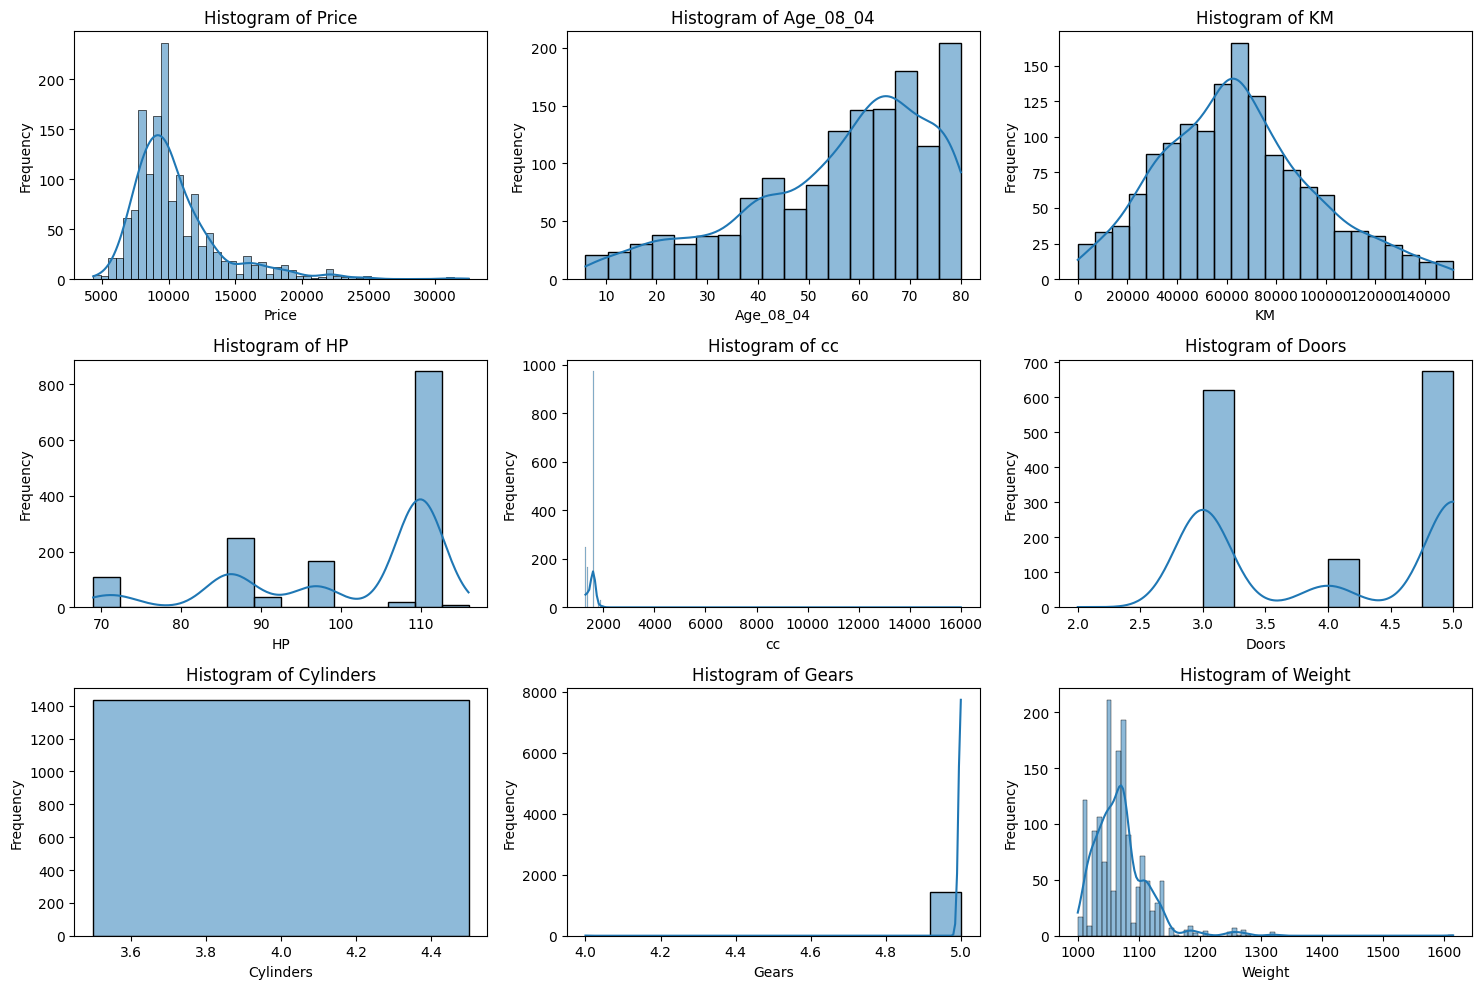

In [ ]:
plot_numerical_distributions(toyota_numerical_cls, toyota_numerical_cls.columns, rows=3, cols=3)

- **Price:** Distribution is right-skewed with most values concentrated between 5000 and 15000.Few values are significantly higher, indicating some expensive cars.
- **Age_08_04:** Shows a roughly uniform distribution with a slight increase in frequency as the age increases.Most cars are older, with ages between 50 and 80 months.
- **KM:** Distribution is relatively normal with a peak around 60000 KM.
Some high mileage cars are present, indicated by the tail on the right.
- **HP (Horse Power):** Distribution is bimodal with peaks around 90 and 110 HP.
Indicates two common ranges of horsepower among the cars.
- **cc (Cubic Capacity):** Highly right-skewed with a major peak at 2000 cc.
Indicates most cars have a cubic capacity around 2000 cc, with very few higher values.
- **Doors:** Distribution is multimodal with distinct peaks at 3, 4, and 5 doors.Indicates these are the most common door configurations.
- **Cylinders:** Uniform distribution with a single value around 4.Indicates all cars have 4 cylinders.
- **Gears:** Highly right-skewed with most values at 5 gears.
Indicates 5-gear cars are the most common.
- **Weight:**Right-skewed distribution with most values between 1000 and 1300 kg.Few heavier cars indicated by the long tail on the right.

In [ ]:
def plot_numerical_boxplot(df, columns, rows=3, cols=3): # Increased rows to 3 to accomodate 9 plots
    """
    Function to plot the distributions of numerical columns in a DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of numerical columns to plot.
    rows (int): Number of rows in the subplot grid.
    cols (int): Number of columns in the subplot grid.
    """

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

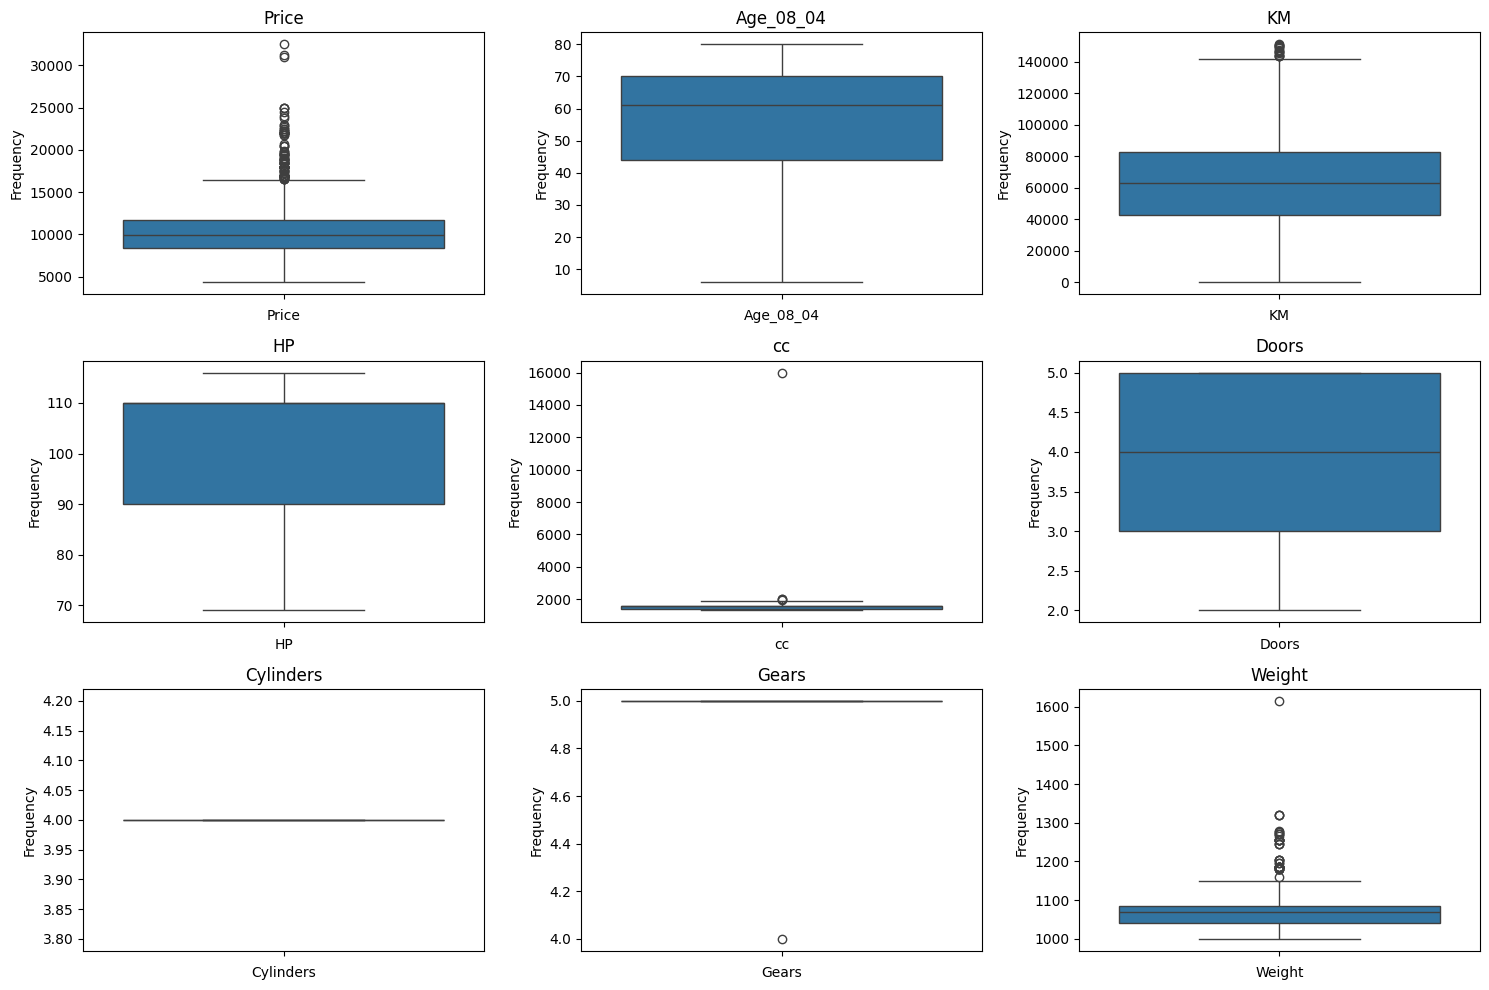

In [ ]:
plot_numerical_boxplot(toyota_numerical_cls, toyota_numerical_cls.columns, rows=3, cols=3)

- Price and Weight have a significant number of outliers, indicating variability in car prices and weights.
- Age_08_04, HP, Doors, Cylinders, and Gears show relatively uniform distributions with minimal outliers.
- KM and cc have some notable outliers, indicating some cars with very high mileage and engine capacity.

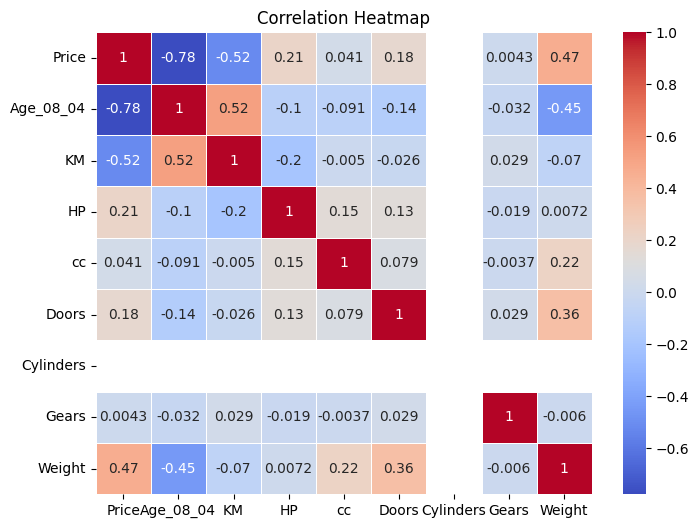

In [ ]:
#Correlation Heatmap
correlation_matrix = toyota_numerical_cls.corr()
fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure and axes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

- **Price** is most strongly influenced by **Age_08_04, KM,** and **Weight.**
- **Age_08_04 and KM** are strongly correlated, indicating that mileage increases with the age of the car.
- **Weight** has a noticeable impact on both **Price and Doors**, suggesting that heavier cars tend to be newer, more expensive, and have more doors.
- Variables like **HP, cc, and Gears** show weaker correlations with other variables, suggesting they have less influence on the overall relationships within the dataset.

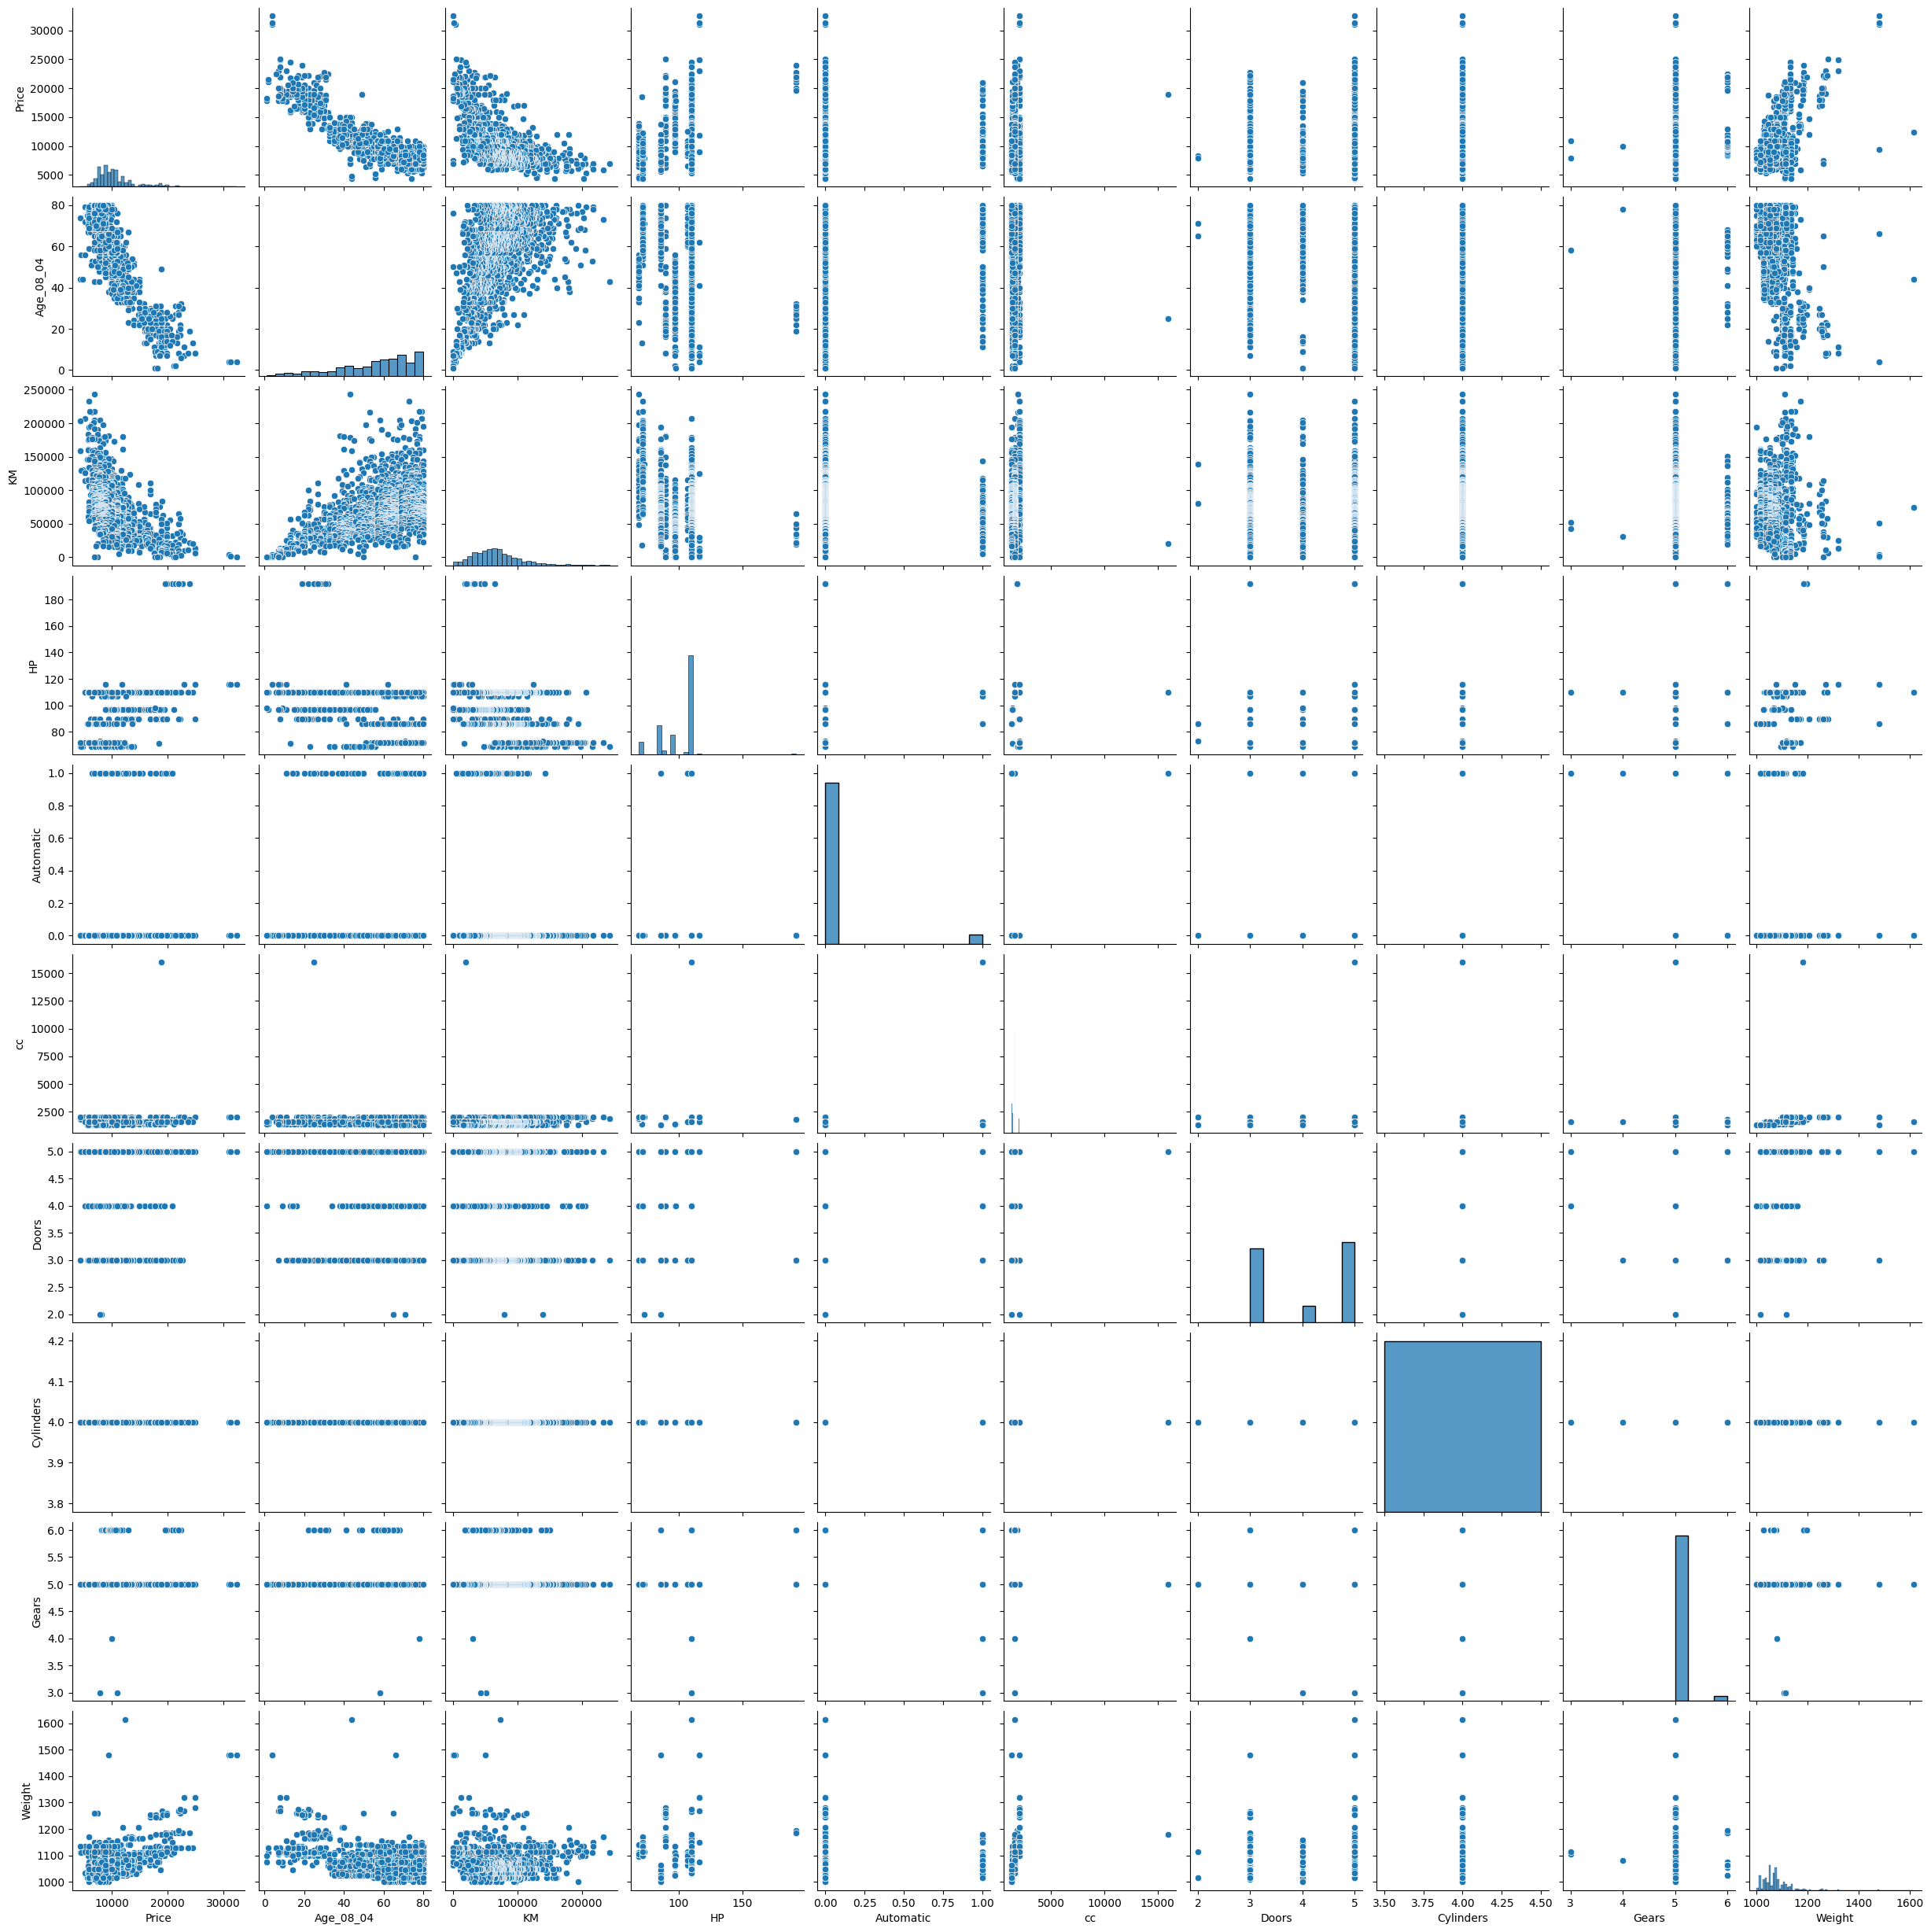

In [ ]:
# checking relation between the pair for variables
sns.pairplot(dataset_Toyata)

###  **Price** is most strongly influenced by **Age_08_04, KM,** and **Weight.**

Correlation between Price and Weight: 0.46516356921643764
Correlation between Price and Age_08_04: -0.777535652611586
Correlation between Price and KM: -0.5156348055168778


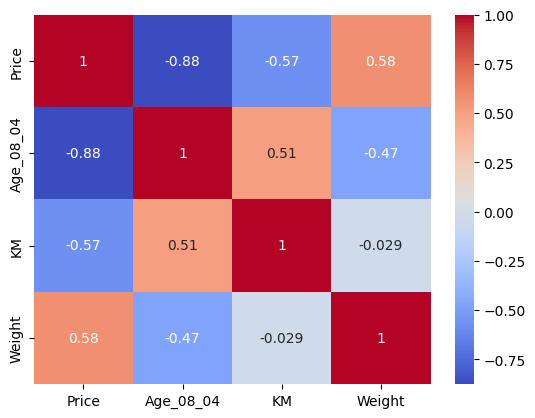

In [ ]:
# correlation for price vs Age_08_04, KM, and Weight
sns.heatmap(dataset_Toyata[['Price', 'Age_08_04', 'KM', 'Weight']].corr(), annot=True, cmap='coolwarm')
c1 = toyota_numerical_cls['Price'].corr(toyota_numerical_cls['Weight'])
c3 = toyota_numerical_cls['Price'].corr(toyota_numerical_cls['Age_08_04'])
c4 = toyota_numerical_cls['Price'].corr(toyota_numerical_cls['KM'])
print('Correlation between Price and Weight:', c1)
print('Correlation between Price and Age_08_04:', c3)
print('Correlation between Price and KM:', c4)


- There is a moderate positive correlation between the price of a car and its weight.
- There is a strong negative correlation between the price of a car and its age.
- There is a moderate negative correlation between the price of a car and the kilometers it has been driven.

In [ ]:
#Will choose age,km and weight
toyota_numerical_cls[["Price","Weight","Age_08_04","KM"]].describe()

Price       Weight    Age_08_04             KM
count   1436.000000  1436.000000  1436.000000    1436.000000
mean   10487.192897  1069.658774    56.231894   64545.363162
std     3332.616630    45.685463    18.223540   30800.985659
min     4350.000000  1000.000000     6.000000       1.000000
25%     8450.000000  1040.000000    44.000000   43000.000000
50%     9900.000000  1070.000000    61.000000   63358.750000
75%    11660.000000  1085.000000    70.000000   82758.500000
max    32500.000000  1615.000000    80.000000  151300.000000

**2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

###Model fitting

In [ ]:
new_df = toyota_numerical_cls.copy()
# Ensure dataset_Toyata includes only the 'category' column and has a common index/key to merge with new_df
category_df = dataset_Toyata[['Fuel_Type']]
# Add the 'category' column to new_df
new_df = new_df.join(category_df, how='left')

In [ ]:
#one-hot encoding of categorical variable
new_df = pd.get_dummies(new_df, columns=['Fuel_Type'], drop_first=True)
# Convert boolean to integer if needed
new_df = new_df.astype(int) # Use a list to select multiple columns
new_df.head()
#Label encoding converting categorical to numerical value
# Create a mapping for 'Fuel Type'
#fuel_mapping = {'Diesel': 1, 'Petrol': 2,'NaN':0}
# Apply the mapping to the 'Fuel_Type' column
#new_df['Fuel_Type'] = new_df['Fuel_Type'].map(fuel_mapping)

Price  Age_08_04     KM  HP    cc  Doors  Cylinders  Gears  Weight  \
0  13500         23  46986  90  1600      3          4      5    1070   
1  13750         23  72937  90  1600      3          4      5    1070   
2  13950         24  41711  90  1600      3          4      5    1070   
3  14950         26  48000  90  1600      3          4      5    1070   
4  13750         30  38500  90  1600      3          4      5    1070   

   Fuel_Type_Diesel  Fuel_Type_Petrol  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 1                 0  
4                 1                 0

In [ ]:
#All converted to numerical values
new_df.isnull().sum()

Price               0
Age_08_04           0
KM                  0
HP                  0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [ ]:
#Fitting with all independent variables
# Model 1: Using all features
x = new_df.drop(['Price'],axis=1)
y = new_df['Price']
x = sm.add_constant(x)
print(x)

      Age_08_04     KM   HP    cc  Doors  Cylinders  Gears  Weight  \
0            23  46986   90  1600      3          4      5    1070   
1            23  72937   90  1600      3          4      5    1070   
2            24  41711   90  1600      3          4      5    1070   
3            26  48000   90  1600      3          4      5    1070   
4            30  38500   90  1600      3          4      5    1070   
...         ...    ...  ...   ...    ...        ...    ...     ...   
1431         69  20544   86  1300      3          4      5    1025   
1432         72  19000   86  1300      3          4      5    1015   
1433         71  17016   86  1300      3          4      5    1015   
1434         70  16916   86  1300      3          4      5    1015   
1435         76      1  110  1600      5          4      5    1114   

      Fuel_Type_Diesel  Fuel_Type_Petrol  
0                    1                 0  
1                    1                 0  
2                    1        

In [ ]:
y.shape, x.shape

((1436,), (1436, 10))

In [ ]:
# Linear regression using statsmodel OLS
model_sm = sm.OLS(y,x).fit()
print(model_sm.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.666     
Dependent Variable:   Price              AIC:                  25807.8853
Date:                 2024-07-17 07:30   BIC:                  25860.5814
No. Observations:     1436               Log-Likelihood:       -12894.   
Df Model:             9                  F-statistic:          318.5     
Df Residuals:         1426               Prob (F-statistic):   0.00      
R-squared:            0.668              Scale:                3.7126e+06
-------------------------------------------------------------------------
                   Coef.    Std.Err.    t     P>|t|    [0.025     0.975] 
-------------------------------------------------------------------------
Age_08_04        -109.8578    3.7752 -29.1000 0.0000  -117.2633 -102.4523
KM                 -0.0182    0.0021  -8.7231 0.0000    -0.0223   -0.0141
HP                 45.9832    5.8765   7.8249 0.0000    34.

In [ ]:
model_sm.rsquared

0.6678169743232008

**66.78%** of the variance in the dependent variable is predictable from the independent variables.

###Fitting model using Scikit-learn

In [ ]:
# Model 2: Using a subset of features
from sklearn import linear_model
#Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the oyota data
regression_model.fit(X = pd.DataFrame(new_df[["Weight","Age_08_04","KM"]]),y=y)


# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

# check for R^2 value.
regression_model.score(X = pd.DataFrame(new_df[["Weight","Age_08_04","KM"]]), y = new_df["Price"])


3570.7121542554614
[ 1.34279382e+01 -1.08696247e+02 -2.06774836e-02]


0.646317045797226

- This value indicates that approximately **64.63%** of the variance in the dependent variable is explained by the model. This suggests a moderate fit, implying that the model explains a significant portion of the variance

In [ ]:
train_prediction = regression_model.predict(X = pd.DataFrame(new_df[["Weight","Age_08_04","KM"]]))
print(train_prediction)

[14467.04013045 13930.43875333 14467.41760916 ...  9130.78783968
  9241.55183537 10268.49987173]


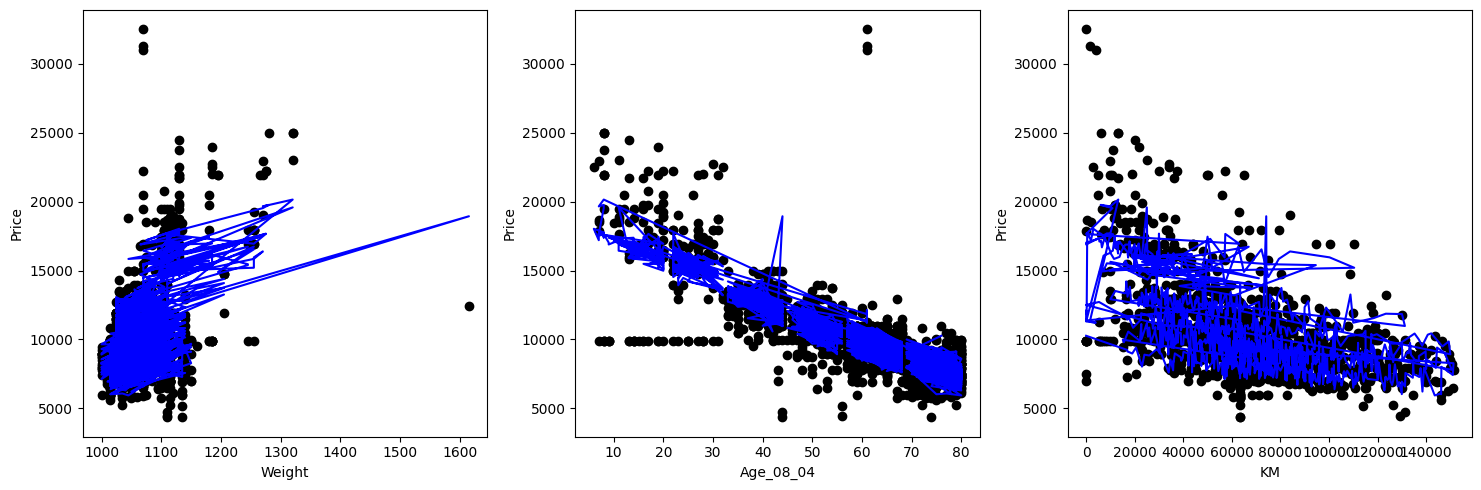

In [ ]:
# Assuming 'train_prediction' is the predicted 'Price' values from your model
# Plot the predicted values against each feature individually
plt.figure(figsize=(15, 5))
##Weight
plt.subplot(1, 3, 1)
plt.scatter(new_df["Weight"], new_df["Price"], color="black")
plt.plot(new_df["Weight"], train_prediction, color="blue")
plt.xlabel("Weight")
plt.ylabel("Price")
##Age
plt.subplot(1, 3, 2)
plt.scatter(new_df["Age_08_04"], new_df["Price"], color="black")
plt.plot(new_df["Age_08_04"], train_prediction, color="blue")
plt.xlabel("Age_08_04")
plt.ylabel("Price")
##Km
plt.subplot(1, 3, 3)
plt.scatter(new_df["KM"], new_df["Price"], color="black")
plt.plot(new_df["KM"], train_prediction, color="blue")
plt.xlabel("KM")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

**Weight vs. Price:**
- There seems to be a weak positive correlation between Weight and Price. As the weight increases, the price slightly tends to increase, but the data points are quite scattered.
- The wide scatter indicates that Weight alone is not a strong predictor of Price.

**Age_08_04 vs. Price:**
- There appears to be a strong negative correlation between Age_08_04 and Price. As the age increases, the price tends to decrease.
- This makes sense as older cars typically have lower prices.

**KM vs. Price:**
- There is a negative correlation between KM (mileage) and Price. As the KM increases, the price tends to decrease.
- This also makes sense as cars with higher mileage generally have lower prices.

**Inference:**
- Age_08_04 and KM show clear negative correlations with Price, suggesting they are important predictors for the model.
- Weight shows a weak positive correlation with Price.



In [ ]:
error_sm = model_sm.resid
error_sm
print(round(sum(error_sm),2))


0.0


In [ ]:
residuals = y - train_prediction
data = pd.DataFrame({'actual_y':y,
       'predicted_y':train_prediction,
       'error1': error_sm,
       'error2':residuals})
print(data)

      actual_y   predicted_y       error1       error2
0        13500  14467.040130 -1143.193536  -967.040130
1        13750  13930.438753  -420.922609  -180.438753
2        13950  14467.417609  -679.333188  -517.417609
3        14950  14119.984420   654.833123   830.015580
4        13750  13881.635525  -278.622145  -131.635525
...        ...           ...          ...          ...
1431      7500   9409.509554 -1224.521720 -1909.509554
1432     10845   8981.067465  2535.156150  1863.932535
1433      8500   9130.787840    44.192428  -630.787840
1434      7250   9241.551835 -1317.485200 -1991.551835
1435      6950  10268.499872 -3394.921225 -3318.499872

[1436 rows x 4 columns]


###Polynomial Regression Analysis

In [ ]:
# Model 3: Adding polynomial terms (e.g., Age_08_04^2)
# Initialize model
poly_model = linear_model.LinearRegression()
# Make a DataFrame of predictor variables
predictors_X = pd.DataFrame([new_df["Age_08_04"],
                            new_df["Age_08_04"]**2,
                            new_df["Age_08_04"]**3,
                            new_df["Age_08_04"]**4,
                            new_df["Age_08_04"]**5,
                            new_df["Age_08_04"]**6
                           ]).T     # Include weight squared, .T --> transpose( columnwise to rowise)

# Train the model using the new_cars data
poly_model.fit(X = predictors_X,
               y = new_df["Price"])

# Check trained model y-intercept
print("Model intercept: ", poly_model.intercept_)
# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients: ", poly_model.coef_)
# Check R-squared
print("Model Accuracy:", poly_model.score(X = predictors_X, y = new_df["Price"]))

Model intercept:  28119.61021340745
Model Coefficients:  [-2.42874654e+03  2.00834403e+02 -8.11306931e+00  1.63220546e-01
 -1.59519663e-03  6.04470932e-06]
Model Accuracy: 0.6235293211207785


- **Model Accuracy (R-squared):** The R-squared value of 0.6235 indicates that approximately **62.35%** of the variance in the dependent variable (price) is explained by the model.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


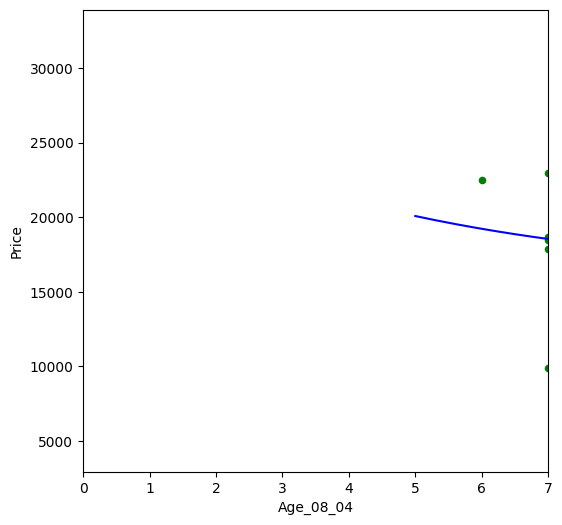

In [ ]:
# Plot the curve from ma to min age
age_min = new_df['Age_08_04'].min()
age_max = new_df['Age_08_04'].max()

# Set range with some padding
poly_line_range = np.arange(age_min - 1, age_max + 1, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                                poly_line_range**2,
                                poly_line_range**3,
                                poly_line_range**4,
                                poly_line_range**5,
                               poly_line_range**6]).T

# print(poly_predictors)
# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

new_df.plot(kind="scatter",x="Age_08_04",y="Price",figsize=(6,6),color="Green",xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

# Multiple Linear Regression

In [ ]:
#Fitting the model MLR
X_features = new_df.drop(['Price'],axis = 1)
X = sm.add_constant(X_features)
print(X.head())
y = new_df['Price']
print(y.shape)

   Age_08_04     KM  HP    cc  Doors  Cylinders  Gears  Weight  \
0         23  46986  90  1600      3          4      5    1070   
1         23  72937  90  1600      3          4      5    1070   
2         24  41711  90  1600      3          4      5    1070   
3         26  48000  90  1600      3          4      5    1070   
4         30  38500  90  1600      3          4      5    1070   

   Fuel_Type_Diesel  Fuel_Type_Petrol  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 1                 0  
4                 1                 0  
(1436,)


In [ ]:
#split data into train and test
train_X, test_X ,train_y,test_y = train_test_split(X,y,test_size =0.2,random_state = 1000)
print(len(new_df))
print(train_X.shape,test_X.shape)
print(train_y.shape,test_y.shape)

1436
(1148, 10) (288, 10)
(1148,) (288,)


In [ ]:
#Model1- Fit the regression model
mlr_model = sm.OLS(train_y,train_X).fit()
mlr_model.rsquared

0.6748582367697267

In [ ]:
#checking the summary of model
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.672     
Dependent Variable:   Price              AIC:                  20613.9134
Date:                 2024-07-17 07:30   BIC:                  20664.3712
No. Observations:     1148               Log-Likelihood:       -10297.   
Df Model:             9                  F-statistic:          262.4     
Df Residuals:         1138               Prob (F-statistic):   2.27e-270 
R-squared:            0.675              Scale:                3.6485e+06
-------------------------------------------------------------------------
                   Coef.    Std.Err.    t     P>|t|    [0.025     0.975] 
-------------------------------------------------------------------------
Age_08_04        -106.6033    4.1878 -25.4555 0.0000  -114.8200  -98.3866
KM                 -0.0186    0.0024  -7.8705 0.0000    -0.0233   -0.0140
HP                 45.0503    6.4731   6.9596 0.0000    32.3497   57.7510
cc                 -0.6565    0.1309  -5.0153 0.0000    -0.9134   -0.3997
Doors              -0.7503   65.1861  -0.0115 0.9908  -128.6488  127.1482
Cylinders         803.5294 2471.7967   0.3251 0.7452 -4046.2612 5653.3200
Gears            -745.0459 1919.0674  -0.3882 0.6979 -4510.3536 3020.2618
Weight             12.8024    1.9317   6.6276 0.0000     9.0124   16.5925
Fuel_Type_Diesel 1891.5242  579.8386   3.2622 0.0011   753.8514 3029.1971
Fuel_Type_Petrol  878.0438  513.9052   1.7086 0.0878  -130.2643 1886.3519
-------------------------------------------------------------------------
Omnibus:                455.991        Durbin-Watson:           2.040    
Prob(Omnibus):          0.000          Jarque-Bera (JB):        20216.826
Skew:                   1.088          Prob(JB):                0.000    
Kurtosis:               23.443         Condition No.:           3934334  
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 3.93e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [ ]:
X_features.shape[1]

10

In [ ]:
X.values

array([[   23, 46986,    90, ...,  1070,     1,     0],
       [   23, 72937,    90, ...,  1070,     1,     0],
       [   24, 41711,    90, ...,  1070,     1,     0],
       ...,
       [   71, 17016,    86, ...,  1015,     0,     1],
       [   70, 16916,    86, ...,  1015,     0,     1],
       [   76,     1,   110, ...,  1114,     0,     1]])

In [ ]:
#Vif calculator for features
'''Interpretation of VIF Values:
- VIF = 1: No correlation between the i-th variable and the remaining variables.
- 1 < VIF < 5: Moderate correlation, but not severe enough to warrant corrective measures.
- VIF > 5: High correlation, indicating multicollinearity which might be problematic.
- VIF > 10: Indicates very high correlation and suggests that the variable should be considered for removal or transformation to address multicollinearity. '''
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
   vif = pd.DataFrame()
   vif["Variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
calc_vif(X)

Variables           VIF
0         Age_08_04      1.829417
1                KM      1.595991
2                HP      2.159862
3                cc      1.097976
4             Doors      1.214592
5         Cylinders  38068.407459
6             Gears      1.006744
7            Weight      2.586701
8  Fuel_Type_Diesel     10.894700
9  Fuel_Type_Petrol      9.457053

In [ ]:
## Choosing < 10  VIF values feature
X_new = X.drop(['Cylinders'],axis = 1)
X_new

Age_08_04     KM   HP    cc  Doors  Gears  Weight  Fuel_Type_Diesel  \
0            23  46986   90  1600      3      5    1070                 1   
1            23  72937   90  1600      3      5    1070                 1   
2            24  41711   90  1600      3      5    1070                 1   
3            26  48000   90  1600      3      5    1070                 1   
4            30  38500   90  1600      3      5    1070                 1   
...         ...    ...  ...   ...    ...    ...     ...               ...   
1431         69  20544   86  1300      3      5    1025                 0   
1432         72  19000   86  1300      3      5    1015                 0   
1433         71  17016   86  1300      3      5    1015                 0   
1434         70  16916   86  1300      3      5    1015                 0   
1435         76      1  110  1600      5      5    1114                 0   

      Fuel_Type_Petrol  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1431                 1  
1432                 1  
1433                 1  
1434                 1  
1435                 1  

[1436 rows x 9 columns]

In [ ]:
calc_vif(X_new)

Variables          VIF
0         Age_08_04    18.835976
1                KM     8.589910
2                HP   138.070371
3                cc    17.043281
4             Doors    22.830534
5             Gears  1278.143033
6            Weight  1360.716070
7  Fuel_Type_Diesel    12.211081
8  Fuel_Type_Petrol    78.605661

In [ ]:
# # Fit the regression model
mlr_model_8F = sm.OLS(y, X_new).fit()
print('MLR_model:',mlr_model.rsquared)
print('MLR_model:',mlr_model.rsquared_adj)
print('MLR_MODEL_8F:',mlr_model_8F.rsquared)
print('MLR_MODEL_8F:',mlr_model_8F.rsquared_adj)

MLR_model: 0.6748582367697267
MLR_model: 0.6722868168496279
MLR_MODEL_8F: 0.969544868335167
MLR_MODEL_8F: 0.9693527897192009


In [ ]:
mlr_model_8F.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.969     
Dependent Variable:     Price            AIC:                         25806.1716
Date:                   2024-07-17 07:30 BIC:                         25853.5982
No. Observations:       1436             Log-Likelihood:              -12894.   
Df Model:               9                F-statistic:                 5048.     
Df Residuals:           1427             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.970            Scale:                       3.7108e+06
---------------------------------------------------------------------------------
                        Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
---------------------------------------------------------------------------------
Age_08_04             -109.5590    3.7324  -29.3531  0.0000  -116.8807  -102.2373
KM                      -0.0183    0.0021   -8.7607  0.0000    -0.0223    -0.0142
HP                      45.9606    5.8749    7.8232  0.0000    34.4362    57.4850
cc                      -0.6903    0.1315   -5.2499  0.0000    -0.9483    -0.4324
Doors                   53.0047   58.6081    0.9044  0.3659   -61.9626   167.9720
Gears                  128.4483  363.5200    0.3533  0.7239  -584.6426   841.5392
Weight                  11.5179    1.7514    6.5762  0.0000     8.0822    14.9536
Fuel_Type_Diesel      1846.0452  540.6828    3.4143  0.0007   785.4268  2906.6637
Fuel_Type_Petrol       999.5262  480.3798    2.0807  0.0376    57.1999  1941.8526
--------------------------------------------------------------------------------
Omnibus:                 678.637           Durbin-Watson:              1.414    
Prob(Omnibus):           0.000             Jarque-Bera (JB):           30954.199
Skew:                    1.463             Prob(JB):                   0.000    
Kurtosis:                25.556            Condition No.:              986105   
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[3] The condition number is large, 9.86e+05. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

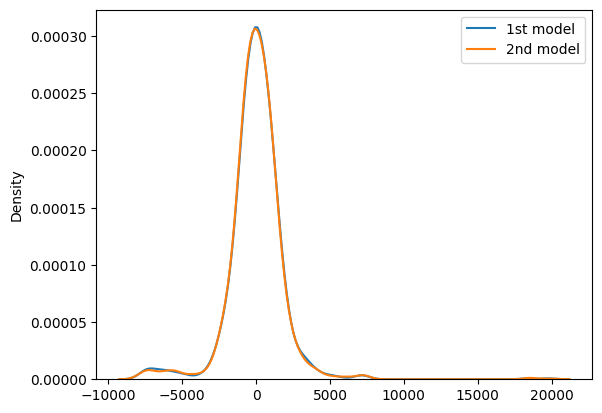

In [ ]:
## Residual Analysis
# KDE plots
Residual1 = mlr_model.resid
Residual2 = mlr_model_8F.resid

sns.kdeplot(Residual1,label = '1st model')
sns.kdeplot(Residual2,label = '2nd model')
plt.legend()
plt.show()

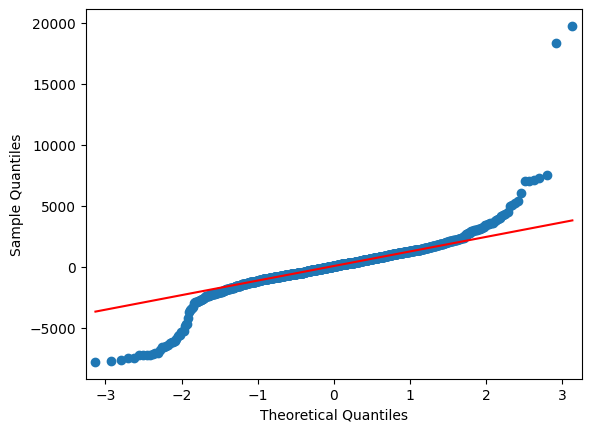

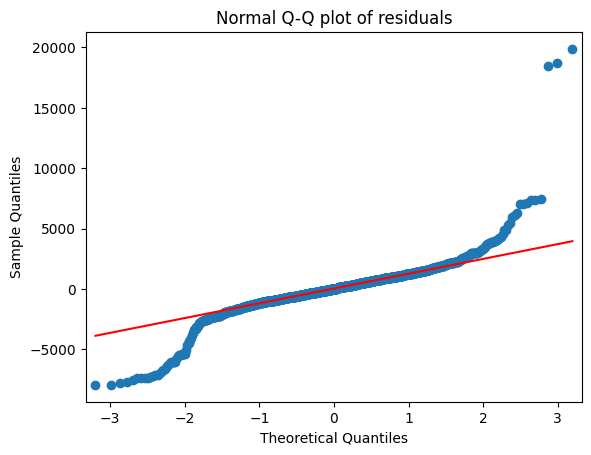

In [ ]:
#qq plot
qqplot=sm.qqplot(Residual1, line='q')
qqplot =sm.qqplot(Residual2,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming new_df is your DataFrame
# Split the data into training and testing sets
X = new_df.drop('Price', axis=1)  # Features
y = new_df['Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
# Model 2: Using a subset of features
features_model2 = ['Weight', 'Age_08_04', 'KM']
model2 = LinearRegression()
model2.fit(X_train[features_model2], y_train)
y_pred2 = model2.predict(X_test[features_model2])

In [ ]:
# Model 3: Adding polynomial terms (e.g., Age_08_04^2)
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()
X_train_poly['Age_08_04^2'] = X_train['Age_08_04'] ** 2
X_test_poly['Age_08_04^2'] = X_test['Age_08_04'] ** 2
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)
y_pred3 = model3.predict(X_test_poly)


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'Model: {model}') # This line prints the model name, not the model object
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    # The following lines need the actual model object, not the model name
    # print('Coefficients:', model.coef_)
    # print('Intercept:', model.intercept_)
    print()

# Pass the actual model objects when calling evaluate_model
evaluate_model(y_test, y_pred1, model1) # Pass model1 instead of 'Model 1'
evaluate_model(y_test, y_pred2, model2) # Pass model2 instead of 'Model 2'
evaluate_model(y_test, y_pred3, model3) # Pass model3 instead of 'Model 3'

Model: LinearRegression()
Mean Squared Error: 4040759.816632424
R-squared: 0.6734917475444034

Model: LinearRegression()
Mean Squared Error: 4218250.955208072
R-squared: 0.6591498108511737

Model: LinearRegression()
Mean Squared Error: 3974387.4381535193
R-squared: 0.6788548797996954



In [ ]:
# Interpretation of coefficients
def interpret_coefficients(model, features):
    coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
    print(coefficients)

print("Model 1 Coefficients:")
interpret_coefficients(model1, X.columns)

print("Model 2 Coefficients:")
interpret_coefficients(model2, features_model2)

print("Model 3 Coefficients:")
interpret_coefficients(model3, X_train_poly.columns)

Model 1 Coefficients:
                   Coefficient
Age_08_04        -1.086327e+02
KM               -1.501107e-02
HP                3.881629e+01
cc               -6.476110e-01
Doors             4.566576e+01
Cylinders         9.663381e-13
Gears            -9.440685e+02
Weight            1.380918e+01
Fuel_Type_Diesel  1.471167e+03
Fuel_Type_Petrol  1.157961e+03
Model 2 Coefficients:
           Coefficient
Weight       13.561099
Age_08_04  -107.957497
KM           -0.018409
Model 3 Coefficients:
                   Coefficient
Age_08_04        -1.400959e+02
KM               -1.448812e-02
HP                4.021378e+01
cc               -6.360687e-01
Doors             6.103198e+01
Cylinders         1.669775e-13
Gears            -8.952127e+02
Weight            1.216535e+01
Fuel_Type_Diesel  1.530634e+03
Fuel_Type_Petrol  1.077856e+03
Age_08_04^2       3.047692e-01


###Lasso and Ridge

<Axes: >

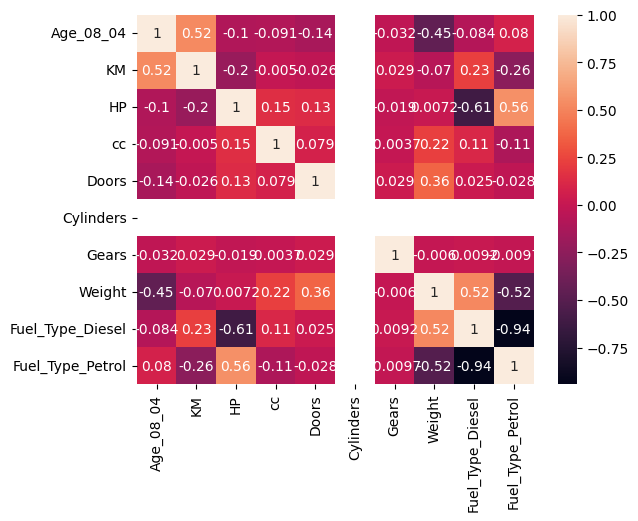

In [ ]:
#Checking for multicollinearity
corr = X_features.corr()
sns.heatmap(corr,annot= True)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import sklearn.cross_decomposition as cv
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [ ]:
LR = LinearRegression()
LR.fit(train_X,train_y)
LR.score(train_X,train_y)

0.6748582367697267

### Lasso regressor

In [ ]:
#Lasso regression model
print("\n.........................Lasso Model............................................\n")
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(train_X,train_y)
print("The train score for lasso model is {}".format(train_score_ls))



.........................Lasso Model............................................

The train score for lasso model is 0.6725429372576212


**A training score of 0.6725 for a Lasso regression model indicates that the model explains approximately 67.25% of the variance in the training data.**

## Ridge Regressor

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(train_X,train_y)
#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(train_X, train_y)
print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.6748574067472972


##Elastic net regularization

In [ ]:
#Elastic net regularization
enet_model = ElasticNet(alpha = 0.1).fit(X_train, y_train)
print(enet_model.score(X_train, y_train))

0.6625674910550121



### Using cross validation

In [ ]:
 # Lasso Cross validation
 #Using the linear CV model
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.0002,0.0009,0.001,0.003,0.0003,0.01, 0.1, 1, 10], random_state=10).fit(train_X,train_y)
#score
print(f'tarining score:{lasso_cv.score(X_train, y_train)}')
lasso_cv.alpha_

tarining score:0.6610794913758486


10.0

## Ridge Cross validation


In [ ]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001,0.002, 0.001,0.01,0.02, 0.1, 1, 10,10.5,11,12,15,17,19,50,100]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(train_X, train_y)))
ridge_cv.alpha_

The train score for ridge model is 0.6704116989606576


100.0

##Elastic Net validation

In [ ]:
#Using the ElasticNetCV CV model
from sklearn.linear_model import ElasticNetCV

#ElasticNetCV Cross validation
ElasticNet_cv = ElasticNetCV(alphas = [0.0001, 0.001,0.002,0.0025,0.003,0.035,0.01, 0.1, 1, 10]).fit(train_X, train_y)

#score
print("The train score for elasticnetCV model is {}".format(ElasticNet_cv.score(train_X, train_y)))
ElasticNet_cv.alpha_

The train score for elasticnetCV model is 0.670701945054571


10.0


##Interview Questions:

####**1.What is Normalization & Standardization and how is it helpful?**





- **Normalization and Standardization** are two common techniques used to scale the features of datasets so that they have similar ranges or distributions. This is particularly useful in machine learning, where features with vastly different scales can negatively impact model performance.

- **Normalization**
Normalization scales the data to a fixed range, usually between 0 and 1 or -1 and 1. This is also known as min-max scaling.
The formula for normalization is: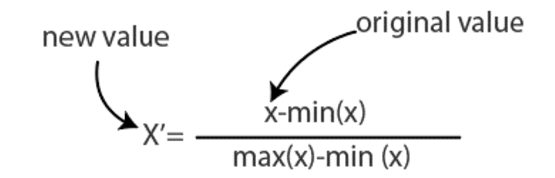

**Use Cases:**
- When you know the data distribution and you need to scale it to a specific range.
- Often used in algorithms that require bounded input, such as neural networks.4

**Standardization**
Standardization (or Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1.
The formula for standardization is:

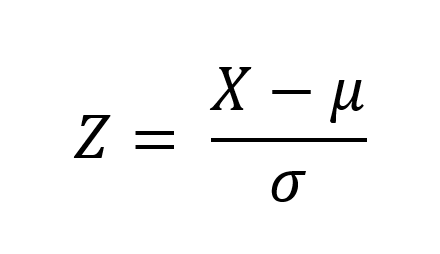


**Use Cases:**
- When the data follows a Gaussian distribution.
- Commonly used in many machine learning algorithms, like Support Vector Machines (SVM) and Principal Component Analysis (PCA), which assume the data is centered around zero.

###Benefits of Normalization and Standardization
1.**Improved Model Performance:**
- Many machine learning algorithms perform better when features are on a similar scale. Algorithms such as gradient descent converge faster when the input features are normalized.

2.**Avoiding Dominance:**
- Features with larger ranges can dominate the learning process, causing the model to weigh them more heavily. Normalization or standardization ensures that each feature contributes equally to the model.

3.**Reduced Bias:**
- In distance-based algorithms like k-nearest neighbors (KNN) and clustering algorithms like k-means, normalization helps in calculating accurate distances.

4.**Improved Interpretability:**
- Data on a common scale can make models more interpretable, as the coefficients in linear models reflect the relative importance of each feature.

**Example:**
Consider a dataset with two features, age (ranging from 0 to 100) and income (ranging from 20,000 to 200,000). Without scaling, the income feature will dominate due to its larger range. After normalization or standardization, both features will contribute equally to the model's learning process.

####**2.What techniques can be used to address multicollinearity in multiple linear regression?**


**Multicollinearity**: occurs when two or more predictor variables in a multiple linear regression model are highly correlated, meaning they provide redundant information about the response variable. This can lead to inflated standard errors for the coefficients, making it difficult to determine the individual effect of each predictor.

Here are some techniques to address multicollinearity:

**1. Remove Highly Correlated Predictors**
If two or more predictors are highly correlated, consider removing one of them from the model. This can be determined using correlation matrices or Variance Inflation Factor (VIF).


**2. Principal Component Analysis (PCA)**
PCA transforms the original correlated predictors into a set of linearly uncorrelated components. These components can then be used as predictors in the regression model. While the original variables lose their interpretability, the components can still explain the variance in the response variable.

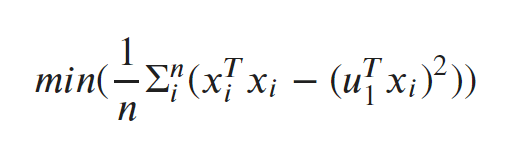




**3. Ridge Regression (L2 Regularization)**
Ridge regression adds a penalty term to the regression equation to shrink the coefficients of correlated predictors. The penalty term is the sum of the squared coefficients multiplied by a tuning parameter (lambda). This helps to mitigate the effects of multicollinearity by keeping the coefficients small.


**4. Lasso Regression (L1 Regularization)**
Lasso regression is similar to ridge regression but adds a penalty term that is the sum of the absolute values of the coefficients. This can lead to some coefficients being exactly zero, effectively performing variable selection and reducing multicollinearity.

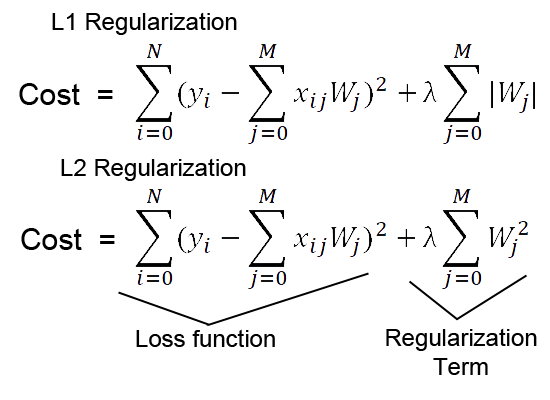






**5. Elastic Net Regression**
Elastic Net combines both L1 (lasso) and L2 (ridge) regularization, providing a balance between the two techniques. It is useful when there are multiple correlated predictors and can perform variable selection and shrinkage simultaneously.

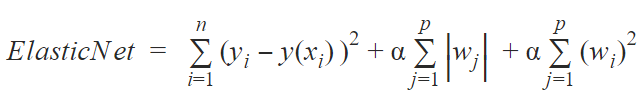




**6. Variance Inflation Factor (VIF)**
Calculate the VIF for each predictor. A VIF value greater than 10 is often used as a rule of thumb to indicate high multicollinearity. Predictors with high VIF values can be removed or transformed.


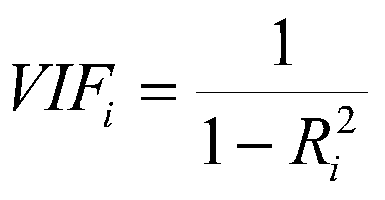



**7. Data Transformation**
Transforming the predictors, such as using log, square root, or polynomial transformations, can sometimes reduce multicollinearity.

**8. Adding Interaction Terms**
If multicollinearity arises from the interaction of predictors, adding interaction terms (products of pairs of predictors) explicitly into the model can sometimes help.

**9. Centered Predictors**
Centering predictors by subtracting their mean can reduce multicollinearity, especially when interaction terms are included in the model.

**10. Combining Predictors**
Combine correlated predictors into a single predictor by taking their average or using a weighted sum. This reduces the number of predictors and hence multicollinearity.

Example:
Suppose we have a multiple linear regression model with predictors
𝑋
1
X
1
​
  and
𝑋
2
X
2
​
  that are highly correlated:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
𝜖
Y=β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +ϵ

Using VIF, we find that
𝑋
1
X
1
​
  and
𝑋
2
X
2
​
  have VIF values greater than 10. We could:

Remove one of the predictors.
Apply ridge regression to shrink the coefficients.
Perform PCA to transform
𝑋
1
X
1
​
  and
𝑋
2
X
2
​
  into uncorrelated components.
Addressing multicollinearity ensures that the regression coefficients are more reliable and interpretable, leading to better model performance and insights.